### Lead Score Assignment

Problem Statement - An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

In [1]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TO supress warnings
import warnings
warnings.filterwarnings('ignore')

### Inspecting the dataset

In [2]:
# Importing the dataset to csv
leads_df = pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Check the shape 
leads_df.shape

(9240, 37)

In [4]:
# Check the statistical aspect
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Check the info of each column
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data Cleaning 

In [6]:
# Check for duplicates
sum(leads_df.duplicated(subset = 'Prospect ID')) == 0

True

In [7]:
# Check for duplicates
sum(leads_df.duplicated(subset = 'Lead Number')) == 0

True

NO duplicate values found in Prospect ID and Lead Number. These are two variables that are indicative of the ID number of the people contacted, hence these can be dropped. 

In [8]:
# Drop 'Prospect ID' and 'Lead Number'
leads_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

There are few columns with level called *'Select'* which means that the customer had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we will convert 'Select' values to NaN

In [9]:
#Replacing 'Select' values with NaN
leads_df=leads_df.replace("Select", np.nan)

In [10]:
# Check for unique values
leads_df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [11]:
# Dropping the columns having only one value for all the leads
leads_df = leads_df.drop(['Magazine','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses'],axis=1)

In [12]:
# Check the percentage of null valued columns
(leads_df.isnull().sum()/leads_df.shape[0]*100).sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

We see a high % of null values infew columns, it's better we drop them in our analysis. 

In [13]:
# Drop the columns having >40% of null values 
leads_df = leads_df.drop(['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [14]:
# Let's recheck the percentage of null valued columns
(leads_df.isnull().sum()/leads_df.shape[0]*100).sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Lead Origin                                       0.000000
Newspaper Article                                 0.0000

There is a huge value of null variables in some columns as seen above.So, instead of dropping these, we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values.

In [15]:
leads_df['Specialization'] = leads_df['Specialization'].fillna('not provided')
leads_df['City'] = leads_df['City'].fillna('not provided')
leads_df['Tags'] = leads_df['Tags'].fillna('not provided')
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].fillna('not provided')
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].fillna('not provided')
leads_df['Country'] = leads_df['Country'].fillna('not provided')
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [16]:
# Let's again recheck the percentage of null valued columns
(leads_df.isnull().sum()/leads_df.shape[0]*100).sort_values(ascending = False)

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Lead Origin                                      0.000000
Newspaper Article                                0.000000
A free copy of Mastering The Interview           0.000000
City                                             0.000000
Tags                                             0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
X Education Forums                               0.000000
What is your current occupation                  0.000000
Search                                           0.000000
What matters most to you in choosing a course    0.000000
Specialization                                   0.000000
Country       

In [17]:
leads_df.shape

(9240, 23)

#### Analysis of Categorical Feature

In [18]:
# Check value counts for 'Country'
leads_df.Country.value_counts(dropna=False)

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [19]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with 'India'

def region(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

leads_df['Country'] = leads_df.apply(lambda x:region(x['Country']), axis = 1)
leads_df['Country'].value_counts()

India            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [20]:
# Since India is the most common occurence among the non-missing values we can impute all not provided values with India

leads_df['Country'] = leads_df['Country'].replace('not provided','India')
leads_df['Country'].value_counts()

India            8953
outside india     287
Name: Country, dtype: int64

In [21]:
# Checking the percentage of loss if the null values are removed
round(100*(sum(leads_df.isnull().sum(axis=1) > 1)/leads_df.shape[0]),2)

1.48

In [22]:
leads_df = leads_df[leads_df.isnull().sum(axis=1) <1]

In [23]:
# Let's again recheck the percentage of null valued columns
(leads_df.isnull().sum()/leads_df.shape[0]*100).sort_values(ascending = False)

Lead Origin                                      0.0
What matters most to you in choosing a course    0.0
A free copy of Mastering The Interview           0.0
City                                             0.0
Tags                                             0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What is your current occupation                  0.0
Lead Source                                      0.0
Specialization                                   0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                      0.0
TotalVisits                                   

In [24]:
leads_df.shape

(9074, 23)

### EDA

#### Univariate Analysis 

###### Categorical Features

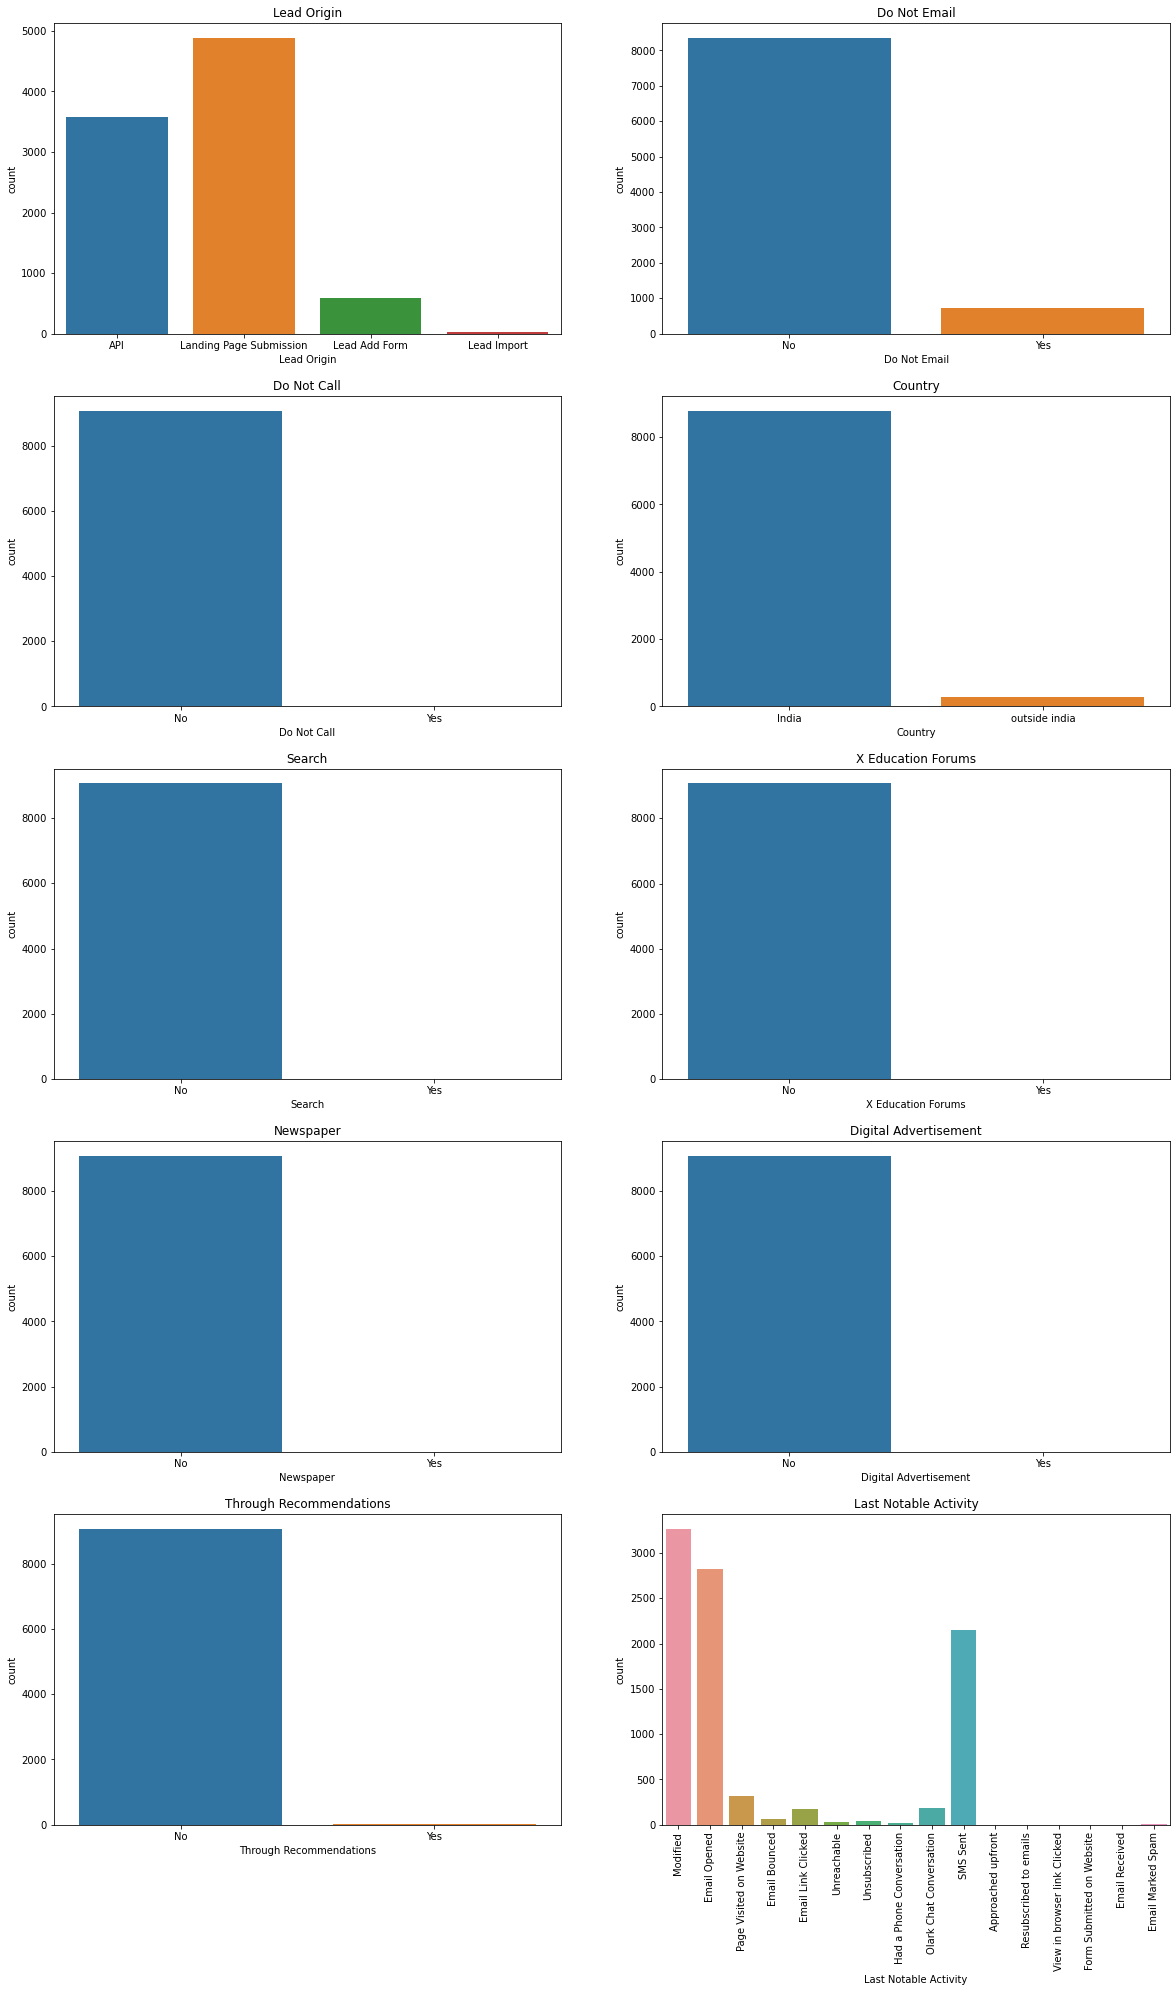

In [25]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(leads_df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(leads_df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(leads_df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(leads_df['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(leads_df['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(leads_df['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,7)
sns.countplot(leads_df['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,8)
sns.countplot(leads_df['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,9)
sns.countplot(leads_df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,10)
sns.countplot(leads_df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

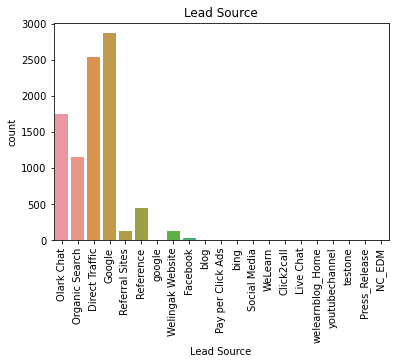

In [26]:
sns.countplot(leads_df['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

- Source for large number of potential leads are coming form Google, Direct Traffic and Olark Chat. 

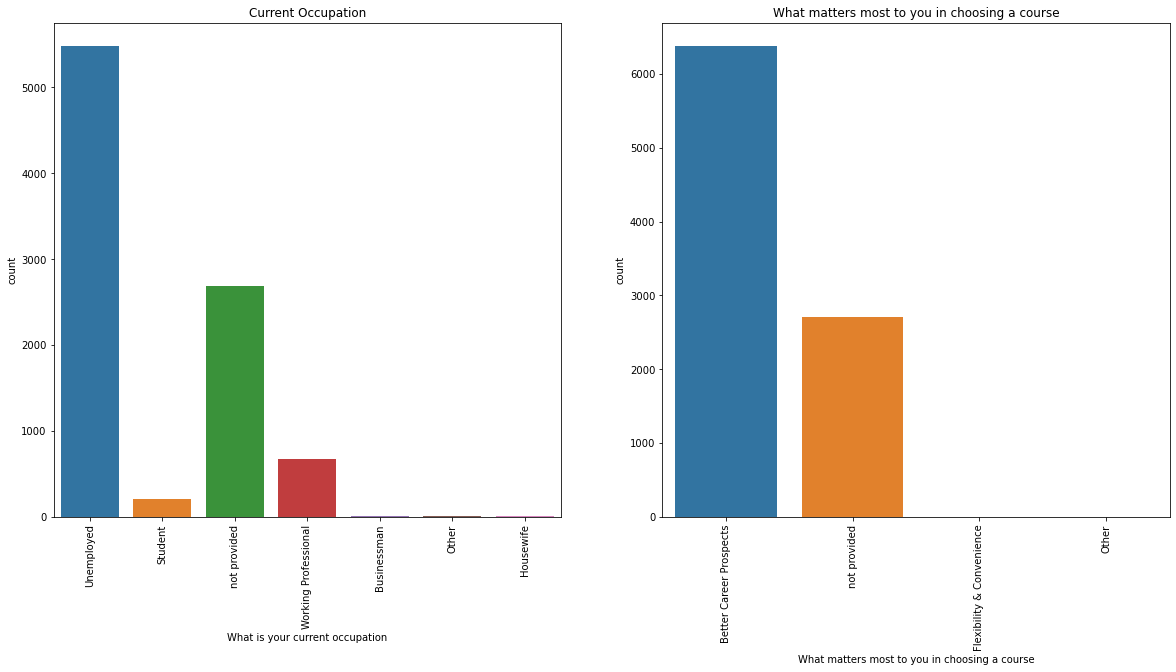

In [27]:
plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
sns.countplot(leads_df['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')

plt.subplot(2,2,2)
sns.countplot(leads_df['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')


plt.show()

###### Numerical Features 

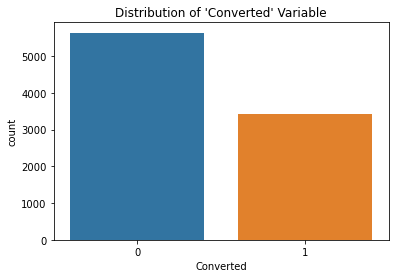

In [28]:
sns.countplot(leads_df['Converted'])
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [29]:
# Finding out conversion rate
Converted = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
Converted

37.85541106458012

- We see the conversion rate of the deals is poor. 

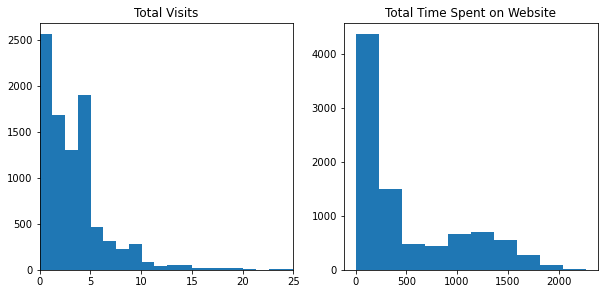

In [30]:
plt.figure(figsize = (10,10))

plt.subplot(221)
plt.hist(leads_df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(leads_df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.show()

- People with higher number of Total Visits and Total Time spent could prove potential leads.

#### Bivariate Analysis

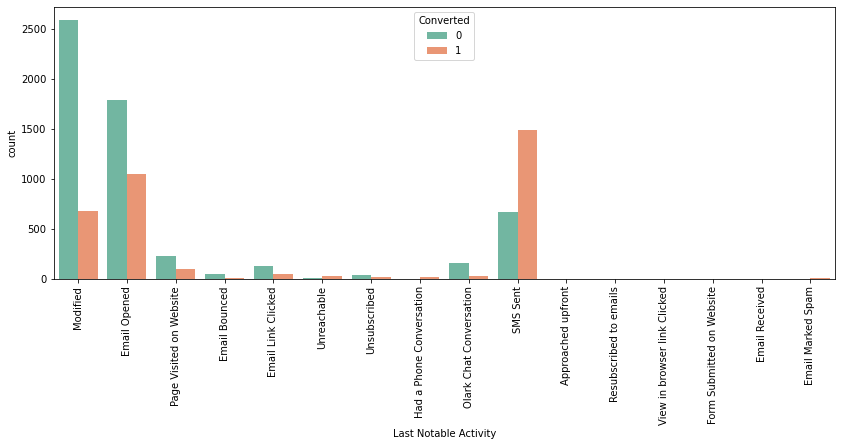

In [31]:
# Visualizing count of Notable activity based on Converted value

plt.figure(figsize = (14,5))
x1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_df , palette = 'Set2')
x1.set_xticklabels(x1.get_xticklabels(),rotation=90)

plt.show()

Insights : 

- Maximum leads are generated having last activity as Email opened but conversion rate is not too good.
- SMS sent as last acitivity has high conversion rate.

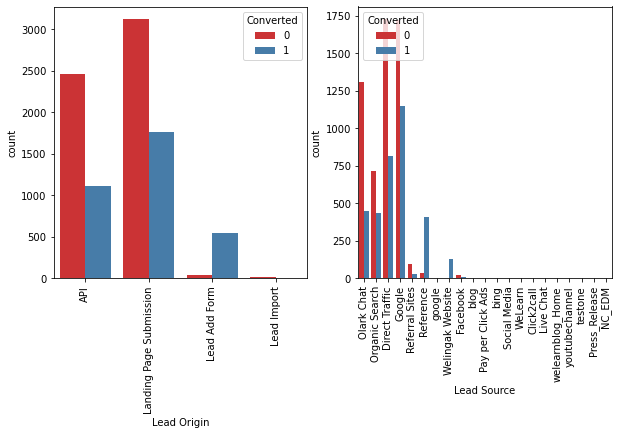

In [32]:
# Visualizing 'Lead Origin' and 'LEad SOurce'against target column
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
p1=sns.countplot(x='Lead Origin', hue='Converted' , data = leads_df , palette = 'Set1')
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)

plt.subplot(1,2,2)
p2=sns.countplot(x='Lead Source', hue='Converted' , data = leads_df , palette = 'Set1')
p2.set_xticklabels(p2.get_xticklabels(),rotation=90)

plt.show()



- API and Landing Page Submission bring higher number of leads as well as conversion.
- Lead Import and Quick Add Form get very few leads.
- Conversion rate for leads from Google, Direct Traffic, Olak Char nad Organic Search are the high. 

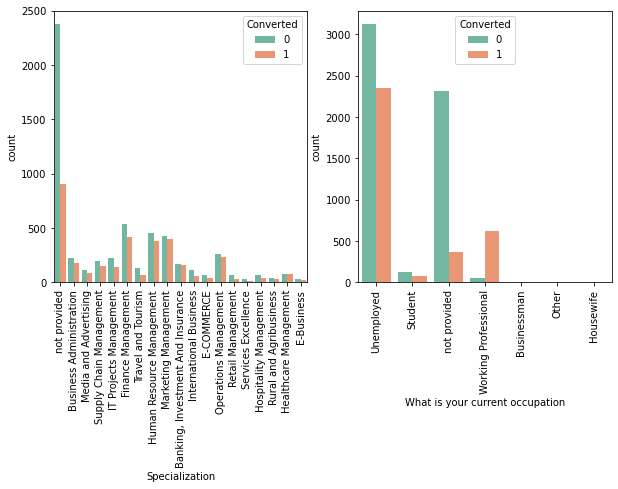

In [33]:
# Visualizing 'Specialization' and Current occupation against target column
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
p3=sns.countplot(x='Specialization', hue='Converted' , data = leads_df , palette = 'Set2')
p3.set_xticklabels(p3.get_xticklabels(),rotation=90)

plt.subplot(1,2,2)
p4=sns.countplot(x='What is your current occupation', hue='Converted' , data = leads_df , palette = 'Set2')
p4.set_xticklabels(p4.get_xticklabels(),rotation=90)

plt.show()

- We see that specialization with Management in them have higher number of leads as well as leads converted. 
- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in terms of Absolute numbers.

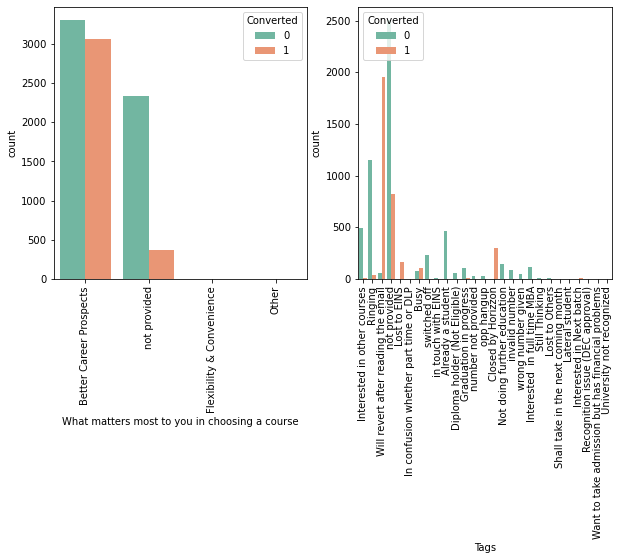

In [34]:
# Visualizing count of variable against target variable
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
p5=sns.countplot(x='What matters most to you in choosing a course', hue='Converted' , data = leads_df , palette = 'Set2')
p5.set_xticklabels(p5.get_xticklabels(),rotation=90)

plt.subplot(1,2,2)
p6=sns.countplot(x='Tags', hue='Converted' , data = leads_df , palette = 'Set2')
p6.set_xticklabels(p6.get_xticklabels(),rotation=90)

plt.show()



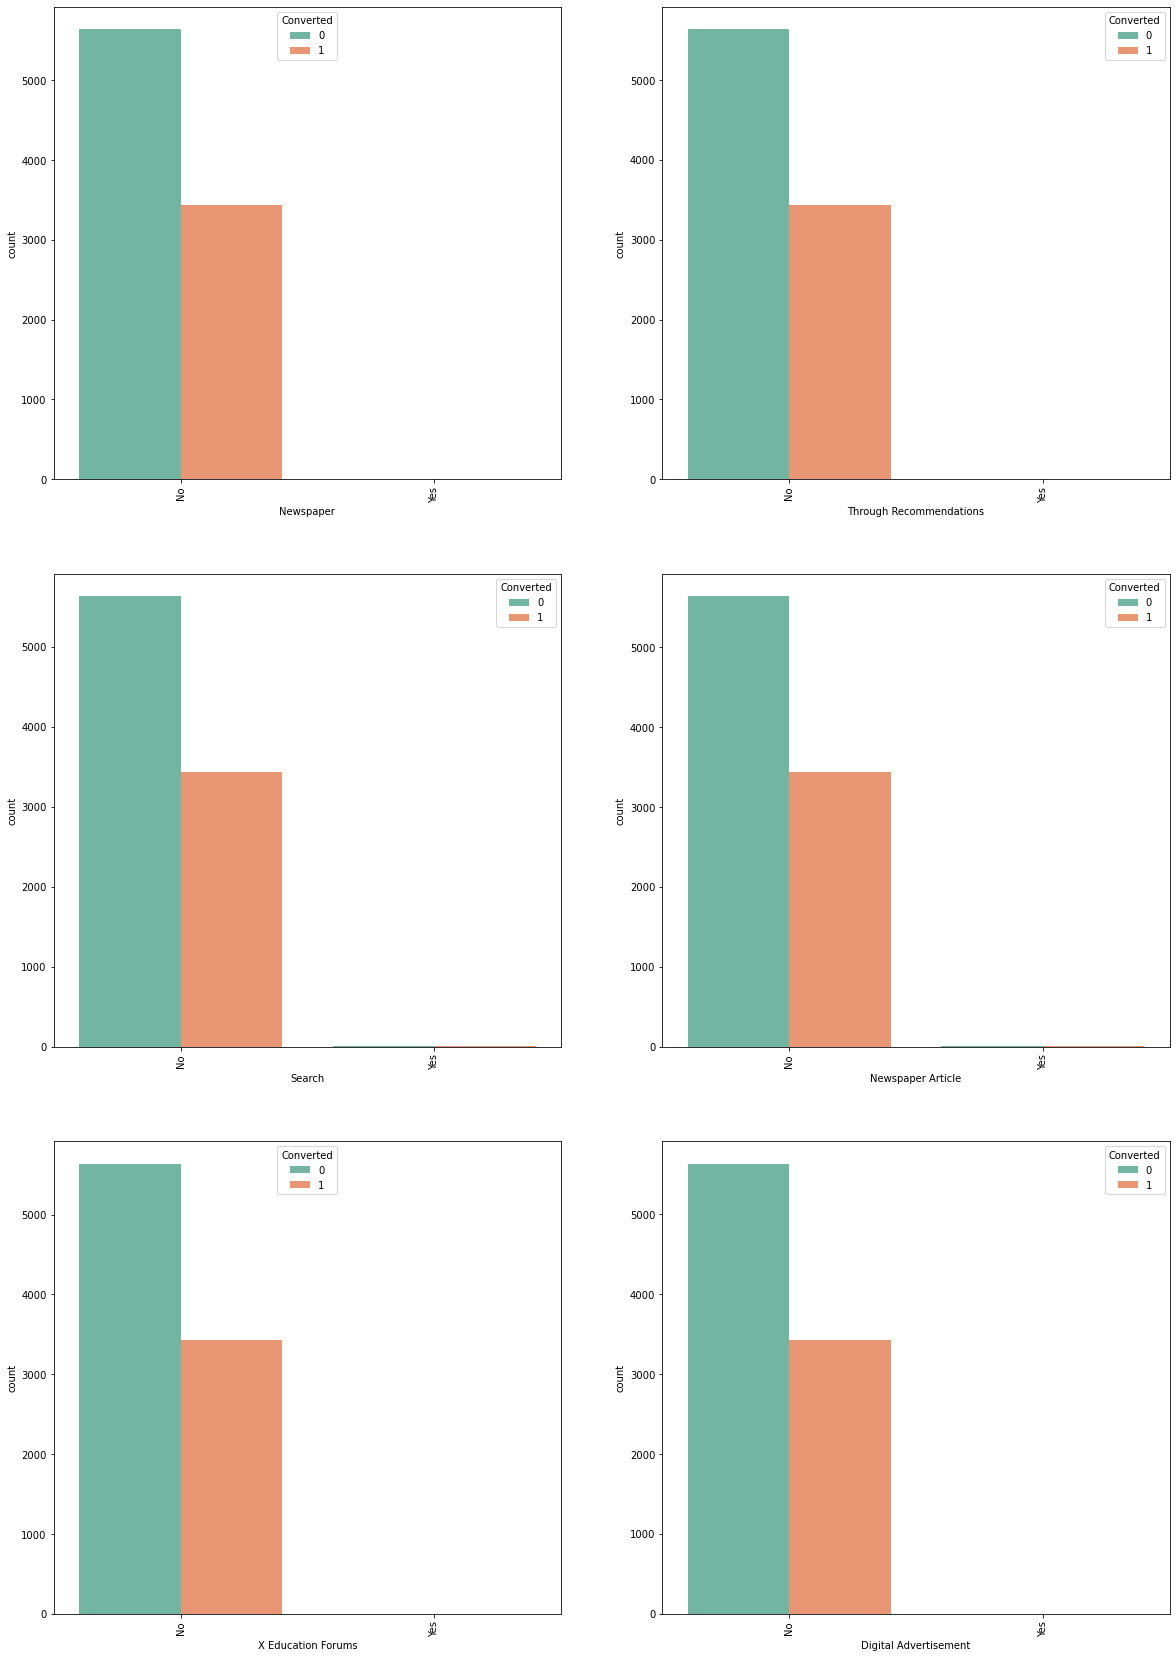

In [35]:
# Visualizing count ofvariable against target column
plt.figure(figsize = (20,40))

plt.subplot(4,2,1)
b1=sns.countplot(x='Newspaper', hue='Converted' , data = leads_df , palette = 'Set2')
b1.set_xticklabels(b1.get_xticklabels(),rotation=90)

plt.subplot(4,2,2)
b2=sns.countplot(x='Through Recommendations', hue='Converted' , data = leads_df , palette = 'Set2')
b2.set_xticklabels(b2.get_xticklabels(),rotation=90)

plt.subplot(4,2,3)
b3=sns.countplot(x='Search', hue='Converted' , data = leads_df , palette = 'Set2')
b3.set_xticklabels(b3.get_xticklabels(),rotation=90)

plt.subplot(4,2,4)
b4=sns.countplot(x='Newspaper Article', hue='Converted' , data = leads_df , palette = 'Set2')
b4.set_xticklabels(b4.get_xticklabels(),rotation=90)

plt.subplot(4,2,5)
b5=sns.countplot(x='X Education Forums', hue='Converted' , data = leads_df , palette = 'Set2')
b5.set_xticklabels(b5.get_xticklabels(),rotation=90)

plt.subplot(4,2,6)
b6=sns.countplot(x='Digital Advertisement', hue='Converted' , data = leads_df , palette = 'Set2')
b6.set_xticklabels(b6.get_xticklabels(),rotation=90)

plt.show()

In [36]:
#checking value counts 
leads_df['Newspaper'].value_counts(dropna=False)

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [37]:
#checking value counts
leads_df['Through Recommendations'].value_counts(dropna=False)

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [38]:
leads_df['Search'].value_counts(dropna=False)

No     9060
Yes      14
Name: Search, dtype: int64

In [39]:
leads_df['Newspaper Article'].value_counts(dropna=False)

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [40]:
leads_df['X Education Forums'].value_counts(dropna=False)

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [41]:
leads_df['Digital Advertisement'].value_counts(dropna=False)

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

- We Can drop the Newspaper,Through Recommendations, Search, Newspaper Article,X Education Forums and Digital Advertisement Column since > 90% is of only one Value

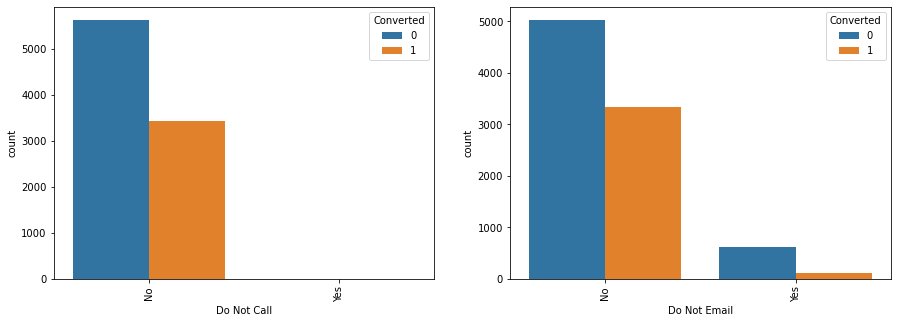

In [42]:
# Visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

a1=plt.subplot(1, 2, 1)
a1=sns.countplot(leads_df['Do Not Call'], hue=leads_df.Converted)
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)

a2=plt.subplot(1, 2, 2)
a2=sns.countplot(leads_df['Do Not Email'], hue=leads_df.Converted)
a2.set_xticklabels(a2.get_xticklabels(),rotation=90)

plt.show()

In [43]:
#checking value counts for Do Not Call
leads_df['Do Not Call'].value_counts(dropna=False)

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [44]:
#checking value counts for Do Not Email
leads_df['Do Not Email'].value_counts(dropna=False)

No     8358
Yes     716
Name: Do Not Email, dtype: int64

- We Can drop the Do Not Call Column since > 90% is of only one Value

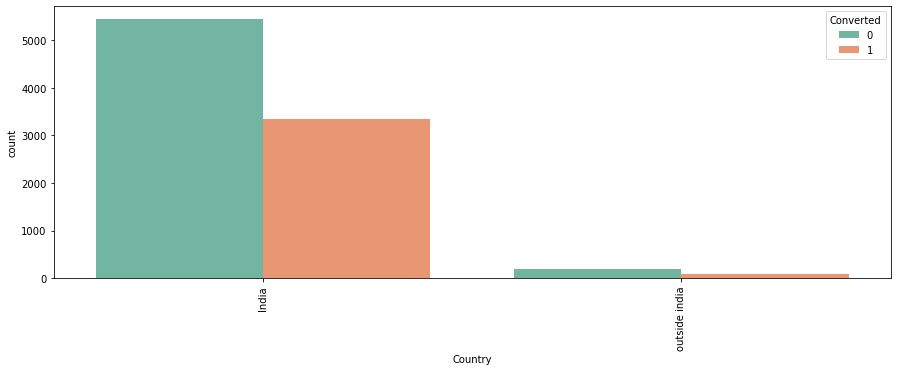

In [45]:
# Plotting Country columns against Taget column 
plt.figure(figsize=(15,5))

c1=sns.countplot(x = 'Country' , hue='Converted', data = leads_df, palette = 'Set2')
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)

plt.show()

- As we can see the Number of Values for India are quite high , this column can be dropped

In [46]:
# Creating a list of columns to be dropped
cols_drop = ['Country', 'Do Not Call', 'Newspaper', 'Through Recommendations', 'Search', 'Newspaper Article', 'X Education Forums','Digital Advertisement','Tags']

We can drop "Tags" , as Tags variable is generated by the sales team after the disscussion with student otherwise it will increase the model accuracy. 

In [47]:
# Dropping columns 
leads_df = leads_df.drop(cols_drop, 1)
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Converted                                      9074 non-null   int64  
 4   TotalVisits                                    9074 non-null   float64
 5   Total Time Spent on Website                    9074 non-null   int64  
 6   Page Views Per Visit                           9074 non-null   float64
 7   Last Activity                                  9074 non-null   object 
 8   Specialization                                 9074 non-null   object 
 9   What is your current occupation                9074 

#### Correlation Matrix

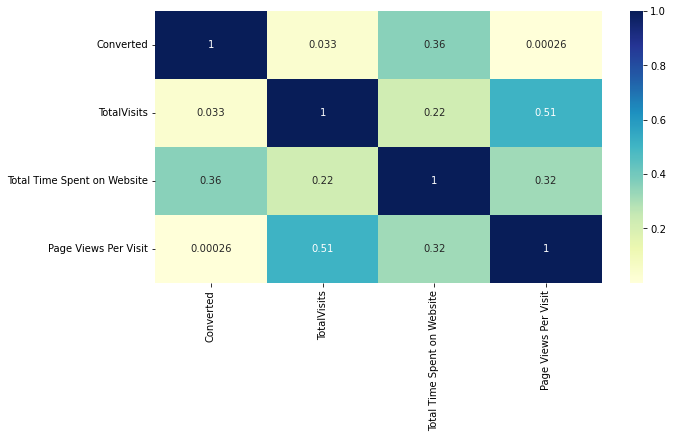

In [48]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(leads_df.corr(),cmap = "YlGnBu" , annot=True)
plt.show()

- There's significant correlation amongst Total Visits and Total Time Spent on website 

#### Outliers

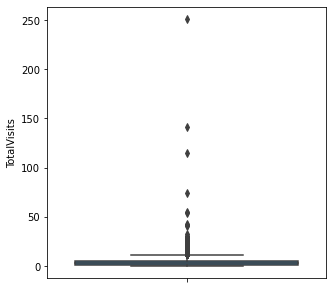

In [49]:
# Check outliers 
plt.figure(figsize = (5,5))
sns.boxplot(y=leads_df['TotalVisits'])
plt.show()

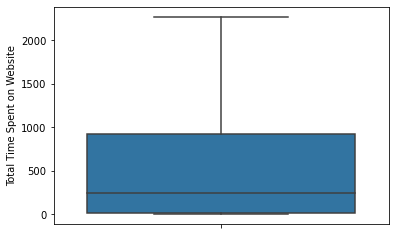

In [50]:
sns.boxplot(y=leads_df['Total Time Spent on Website'])
plt.show()

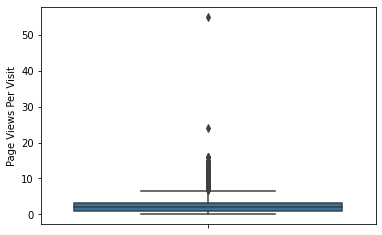

In [51]:
sns.boxplot(y=leads_df['Page Views Per Visit'])
plt.show()

- We see Outliers are present in Total Visits. 

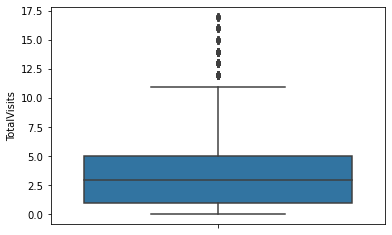

In [52]:
# Outlier Treatment: removing top & bottom 1% of the Column Outlier values

Q3 = leads_df.TotalVisits.quantile(0.99)
leads_df = leads_df[(leads_df.TotalVisits <= Q3)]
Q1 = leads_df.TotalVisits.quantile(0.01)
leads_df = leads_df[(leads_df.TotalVisits >= Q1)]

sns.boxplot(y=leads_df['TotalVisits'])
plt.show()

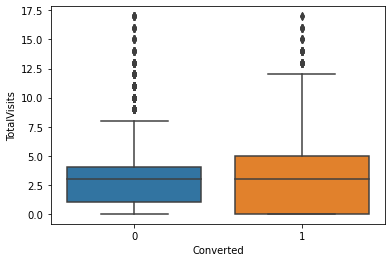

In [53]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_df)
plt.show()

- As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of variable TotalVisits

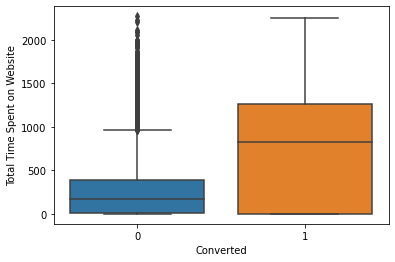

In [54]:
# Visualizing Total Time Spent on website w.r.t Target Variable 'Converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_df)
plt.show()

- As can be seen, leads spending more time on website are more likely to convert , thus website should be made more enagaging to increase conversion rate. 

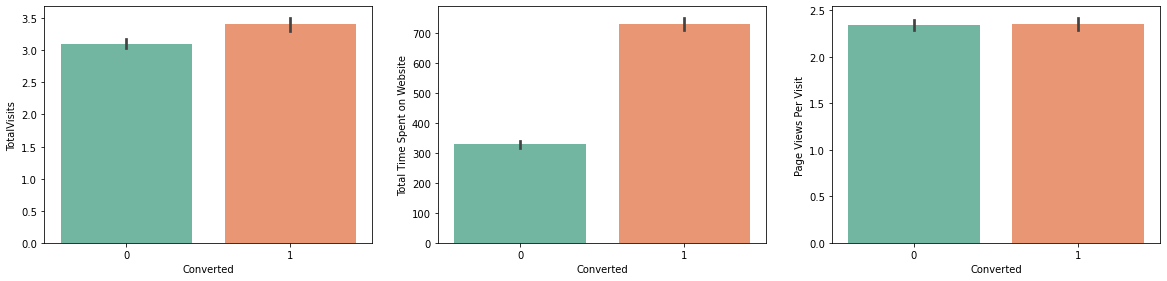

In [55]:
# Checking the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leads_df)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leads_df)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leads_df)
plt.show()

- The conversion rate is high for Total Visits, Total Time Spent on Website and Page Views Per Visit. 

#### Dummy Variable Creation 

In [56]:
# Check the data types of the columns 
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Converted                                      8991 non-null   int64  
 4   TotalVisits                                    8991 non-null   float64
 5   Total Time Spent on Website                    8991 non-null   int64  
 6   Page Views Per Visit                           8991 non-null   float64
 7   Last Activity                                  8991 non-null   object 
 8   Specialization                                 8991 non-null   object 
 9   What is your current occupation                8991 

In [57]:
# Get the list of all categorical columnns to create dummies
cat_col = leads_df.select_dtypes(include = ['object']).columns
cat_col 

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [58]:
# Creating dummy variables using 'get_dummies'
dummy_vars = pd.get_dummies(leads_df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
             'Specialization', 'What is your current occupation',
             'What matters most to you in choosing a course',
             'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
leads_df_dum = pd.concat([leads_df, dummy_vars], axis=1)
leads_df_dum.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,not provided,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,not provided,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,not provided,Unemployed,...,0,0,1,0,0,0,0,0,0,0


In [59]:
# Dropping the original columns after dummies have been created
leads_df_dum = leads_df_dum.drop(['City','What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email','Last Activity', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
leads_df_dum.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


### Train-Test Split

In [60]:
from sklearn.model_selection import train_test_split

# Putting target variable to y
y = leads_df_dum['Converted']

y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [61]:
# Putting feature variable to X
X=leads_df_dum.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [62]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [63]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1467,0.235294,0.393486,0.25000,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
108,0.352941,0.175176,0.18750,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7858,0.647059,0.055458,0.07625,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5220,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3871,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


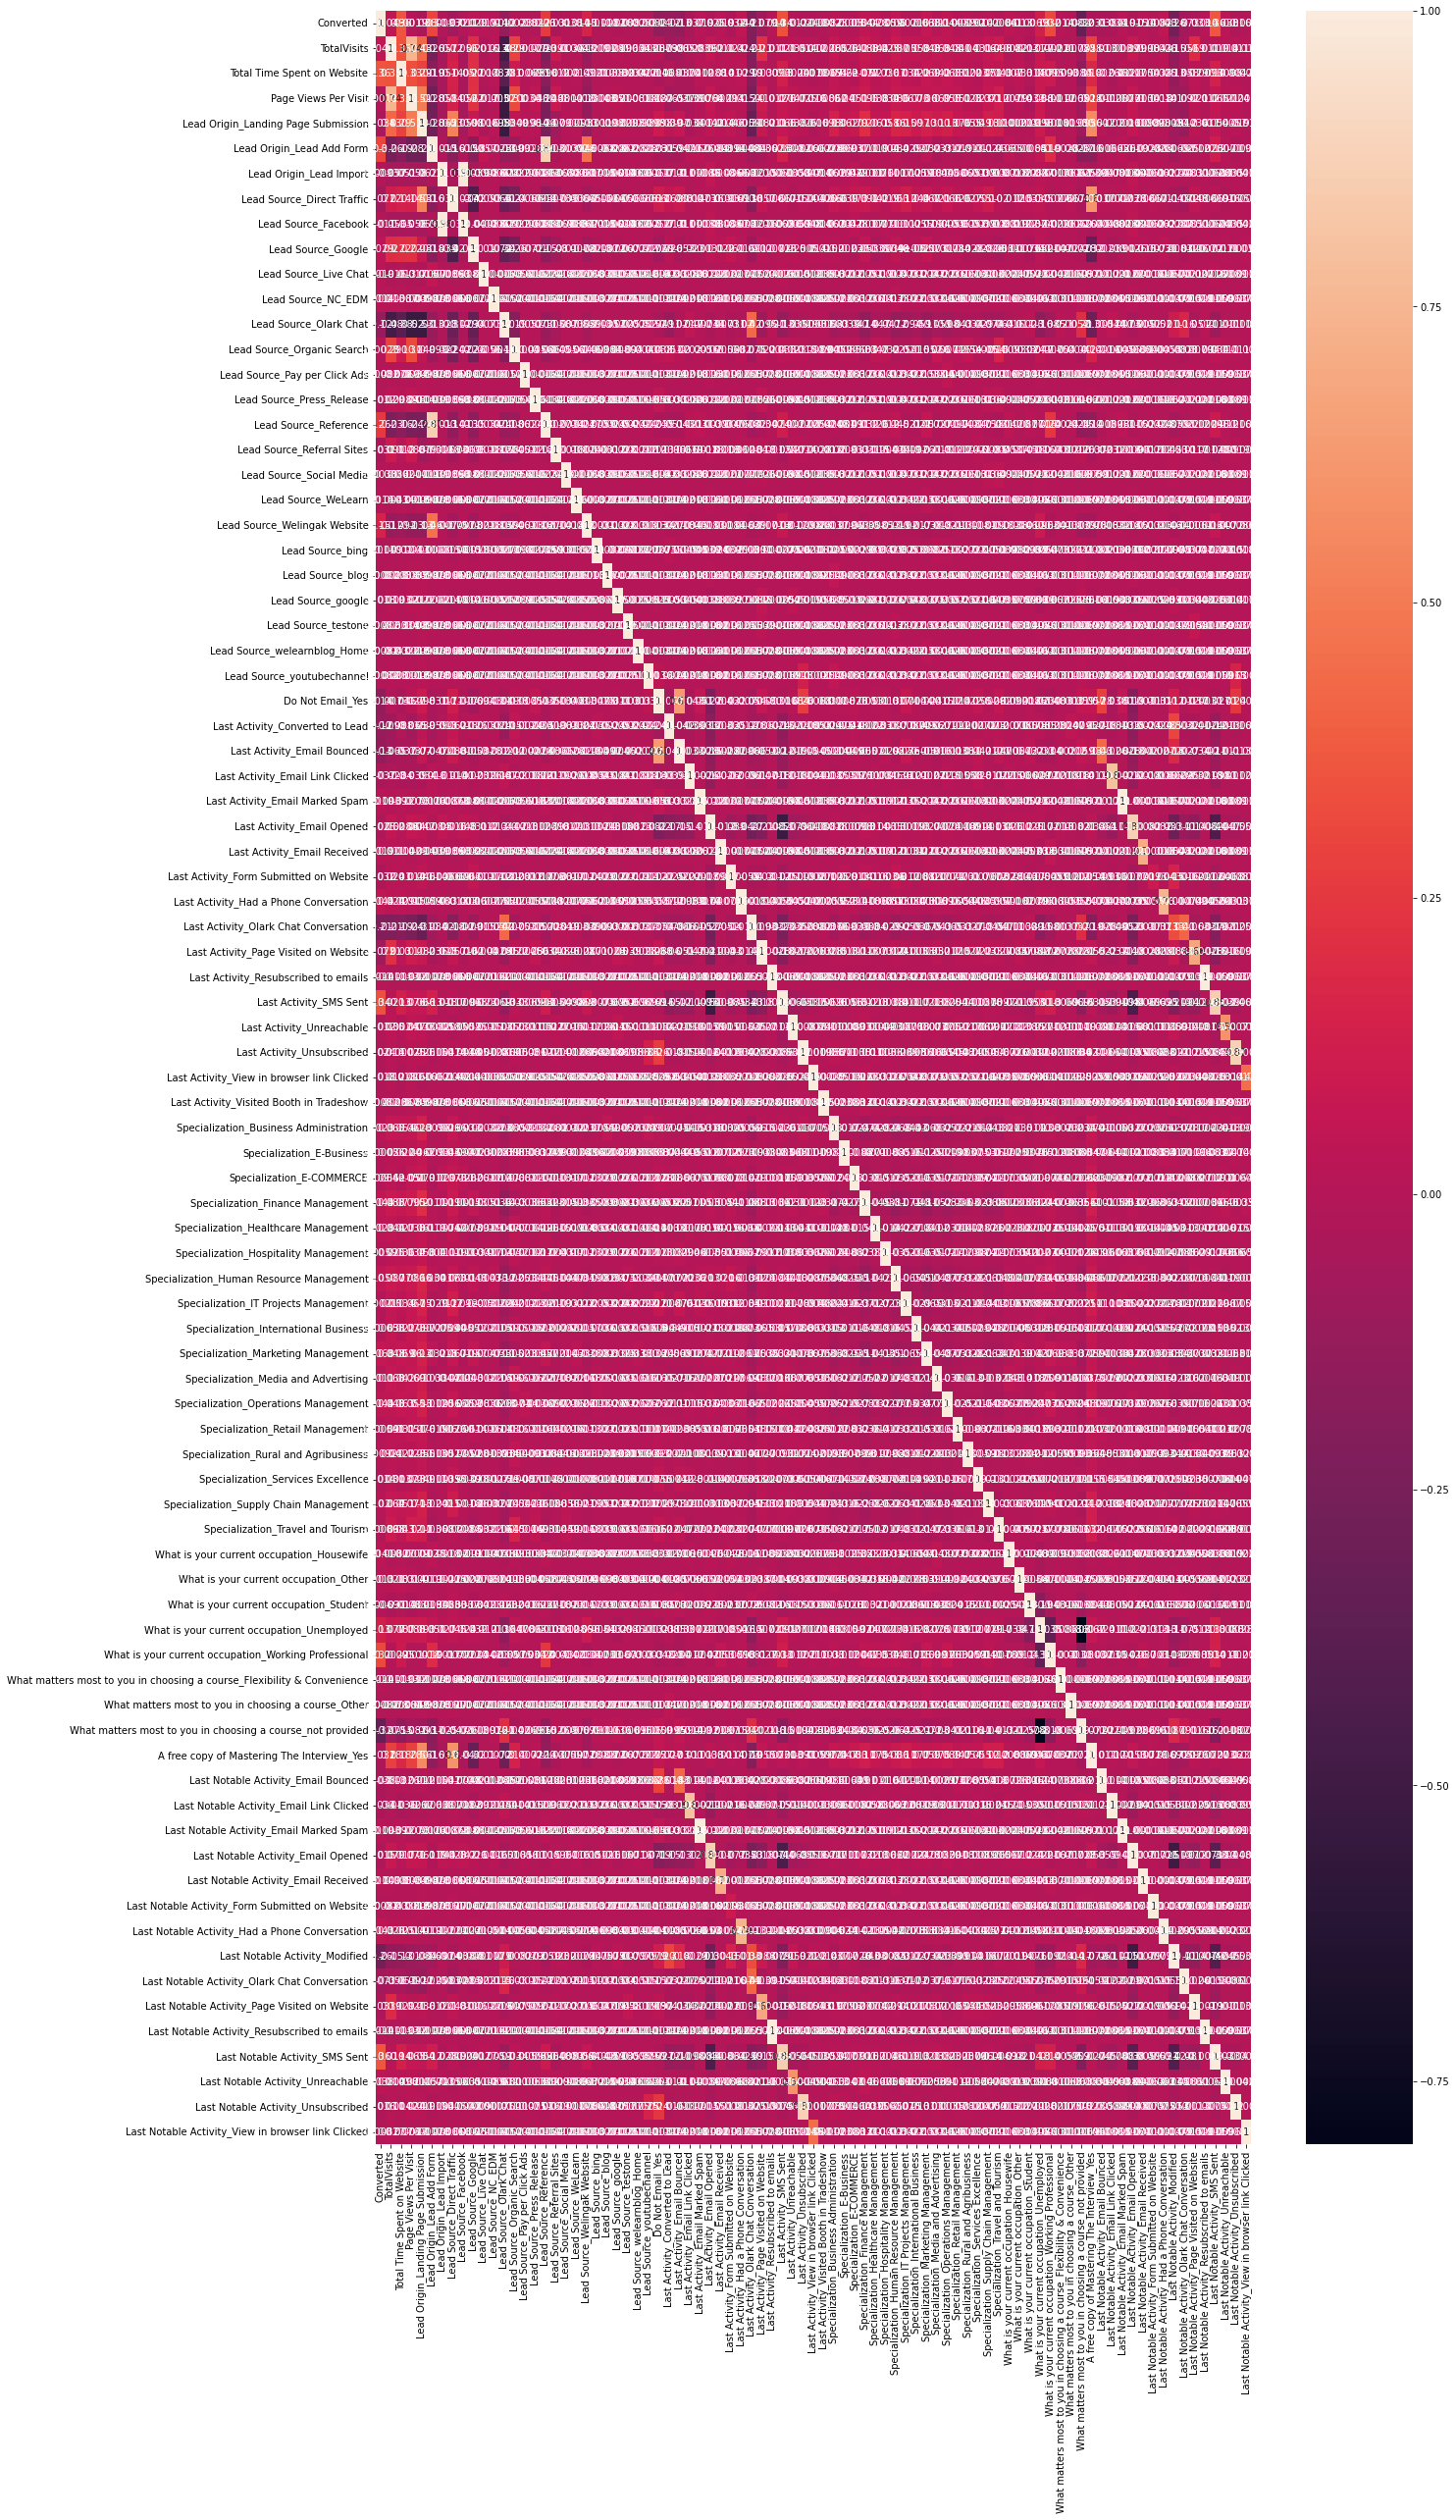

In [64]:
# To check the correlation among varibles
plt.figure(figsize=(20,40))
sns.heatmap(leads_df_dum.corr(), annot = True)
plt.show()

- Since there are a lot of variables it is difficult to drop variable. We will perfrom RFE. 

### Model Building 

In [65]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [66]:
# Import RFE
from sklearn.feature_selection import RFE

In [67]:
# Running RFE with 15 variables as output
rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [68]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 33),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 66),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 64),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Live Chat', False, 54),
 ('Lead Source_NC_EDM', False, 21),
 ('Lead Source_Olark Chat', False, 17),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Pay per Click Ads', False, 69),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', False, 11),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 27),
 ('Lead Source_WeLearn', False, 46),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 67),
 ('Lead Source_blog', False, 51),
 ('Lead Source_google', False, 9),
 ('Lead Source_testone', False, 45),
 ('Lead Source_welearnblog_Home', False, 56),
 ('Lea

In [69]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

- All the variables selected by RFE. 

In [70]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [71]:
# Importing statsmodels
import statsmodels.api as sm

In [72]:
X_train_sm = sm.add_constant(X_train)
ml1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = ml1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2634.1
Date:                Sun, 13 Nov 2022   Deviance:                       5268.3
Time:                        21:06:28   Pearson chi2:                 6.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0370      0.089     -0.418      0.676      -0.210       0.136
TotalVisits                                              1.1093      0.287      3.871      0.000       0.548       1.671
Total Time Spent on Website                              4.1701      0.156     26.717      0.000       3.864       4.476
Page Views Per Visit                                    -2.7365      0.402     -6.802      0.000      -3.525      -1.948
Lead Origin_Lead Add Form                                3.6584      0.258     14.201      0.000       3.153       4.163
Lead Source_Direct Traffic                              -0.5448      0.079     -6.917      0.000      -0.699      -0.390
Lead Source_Referral Sites                              -0.3499      0.332     -1.053      0.292      -1.001       0.301
Lead Source_Welingak Website                             2.3561      1.047      2.250      0.024       0.303       4.409
Do Not Email_Yes                                        -1.8013      0.175    -10.318      0.000      -2.144      -1.459
Last Activity_Olark Chat Conversation                   -0.8919      0.188     -4.742      0.000      -1.261      -0.523
What is your current occupation_Working Professional     2.7926      0.190     14.720      0.000       2.421       3.164
Last Notable Activity_Email Link Clicked                -1.8173      0.257     -7.072      0.000      -2.321      -1.314
Last Notable Activity_Email Opened                      -1.5197      0.088    -17.197      0.000      -1.693      -1.347
Last Notable Activity_Modified                          -1.9858      0.097    -20.412      0.000      -2.176      -1.795
Last Notable Activity_Olark Chat Conversation           -2.0351      0.382     -5.325      0.000      -2.784      -1.286
Last Notable Activity_Page Visited on Website           -1.8682      0.212     -8.826      0.000      -2.283      -1.453
========================================================================================================================
"""

In [73]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,5.28
2,Page Views Per Visit,5.22
1,Total Time Spent on Website,2.00
12,Last Notable Activity_Modified,1.88
8,Last Activity_Olark Chat Conversation,1.71
11,Last Notable Activity_Email Opened,1.50
3,Lead Origin_Lead Add Form,1.44
4,Lead Source_Direct Traffic,1.44
13,Last Notable Activity_Olark Chat Conversation,1.36
6,Lead Source_Welingak Website,1.30


- p-value for Lead Source_Referral Sites is high, hence dropping it. 

In [75]:
X_train.drop(['Lead Source_Referral Sites'], axis = 1, inplace = True)

In [76]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
ml2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = ml2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2634.7
Date:                Sun, 13 Nov 2022   Deviance:                       5269.5
Time:                        21:12:32   Pearson chi2:                 6.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0370      0.089     -0.418      0.676      -0.210       0.136
TotalVisits                                              1.0979      0.286      3.838      0.000       0.537       1.659
Total Time Spent on Website                              4.1727      0.156     26.743      0.000       3.867       4.479
Page Views Per Visit                                    -2.7460      0.402     -6.833      0.000      -3.534      -1.958
Lead Origin_Lead Add Form                                3.6614      0.258     14.212      0.000       3.156       4.166
Lead Source_Direct Traffic                              -0.5391      0.079     -6.859      0.000      -0.693      -0.385
Lead Source_Welingak Website                             2.3563      1.047      2.250      0.024       0.303       4.409
Do Not Email_Yes                                        -1.8041      0.175    -10.327      0.000      -2.146      -1.462
Last Activity_Olark Chat Conversation                   -0.8997      0.188     -4.784      0.000      -1.268      -0.531
What is your current occupation_Working Professional     2.7922      0.190     14.724      0.000       2.421       3.164
Last Notable Activity_Email Link Clicked                -1.8214      0.257     -7.093      0.000      -2.325      -1.318
Last Notable Activity_Email Opened                      -1.5222      0.088    -17.230      0.000      -1.695      -1.349
Last Notable Activity_Modified                          -1.9893      0.097    -20.461      0.000      -2.180      -1.799
Last Notable Activity_Olark Chat Conversation           -2.0251      0.382     -5.300      0.000      -2.774      -1.276
Last Notable Activity_Page Visited on Website           -1.8736      0.212     -8.847      0.000      -2.289      -1.459
========================================================================================================================
"""

In [77]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,5.27
2,Page Views Per Visit,5.21
1,Total Time Spent on Website,2.00
11,Last Notable Activity_Modified,1.87
7,Last Activity_Olark Chat Conversation,1.71
10,Last Notable Activity_Email Opened,1.50
3,Lead Origin_Lead Add Form,1.44
4,Lead Source_Direct Traffic,1.43
12,Last Notable Activity_Olark Chat Conversation,1.36
5,Lead Source_Welingak Website,1.30


- p-value seems fine but the VIF for Page Views Per Visit is high, so let's drop it.  

In [78]:
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [79]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
ml3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = ml3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6279
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2658.8
Date:                Sun, 13 Nov 2022   Deviance:                       5317.7
Time:                        21:15:21   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2108      0.085     -2.488      0.013      -0.377      -0.045
TotalVisits                                             -0.2375      0.214     -1.112      0.266      -0.656       0.181
Total Time Spent on Website                              4.0394      0.153     26.360      0.000       3.739       4.340
Lead Origin_Lead Add Form                                3.7954      0.257     14.768      0.000       3.292       4.299
Lead Source_Direct Traffic                              -0.5437      0.078     -6.964      0.000      -0.697      -0.391
Lead Source_Welingak Website                             2.3606      1.047      2.254      0.024       0.308       4.413
Do Not Email_Yes                                        -1.8194      0.174    -10.473      0.000      -2.160      -1.479
Last Activity_Olark Chat Conversation                   -0.8106      0.188     -4.306      0.000      -1.180      -0.442
What is your current occupation_Working Professional     2.7652      0.189     14.655      0.000       2.395       3.135
Last Notable Activity_Email Link Clicked                -1.7175      0.256     -6.717      0.000      -2.219      -1.216
Last Notable Activity_Email Opened                      -1.4797      0.088    -16.896      0.000      -1.651      -1.308
Last Notable Activity_Modified                          -1.9534      0.096    -20.254      0.000      -2.142      -1.764
Last Notable Activity_Olark Chat Conversation           -1.8823      0.377     -4.998      0.000      -2.620      -1.144
Last Notable Activity_Page Visited on Website           -1.5687      0.202     -7.748      0.000      -1.966      -1.172
========================================================================================================================
"""

In [80]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.37
1,Total Time Spent on Website,1.94
10,Last Notable Activity_Modified,1.83
6,Last Activity_Olark Chat Conversation,1.70
9,Last Notable Activity_Email Opened,1.47
2,Lead Origin_Lead Add Form,1.43
3,Lead Source_Direct Traffic,1.42
11,Last Notable Activity_Olark Chat Conversation,1.36
4,Lead Source_Welingak Website,1.30
7,What is your current occupation_Working Profes...,1.15


- The Values all seem to be in order so now. Let's Predict the model. 

### Model Prediction 

In [81]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1467    0.983503
108     0.092793
7858    0.464938
5220    0.447488
3871    0.155713
686     0.484148
1694    0.103012
2180    0.081195
6845    0.155713
191     0.098772
dtype: float64

In [82]:
# Reshaping into an array 
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98350304, 0.09279324, 0.46493764, 0.44748799, 0.15571306,
       0.48414792, 0.10301179, 0.08119487, 0.15571306, 0.09877204])

In [83]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_prob
0,1,0.983503
1,0,0.092793
2,1,0.464938
3,1,0.447488
4,0,0.155713


In [85]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted
0,1,0.983503,1
1,0,0.092793,0
2,1,0.464938,0
3,1,0.447488,0
4,0,0.155713,0


### Model Evaluation

In [86]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [87]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3476,  450],
       [ 828, 1539]], dtype=int64)

In [88]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.796917209597966

- That's around 80% accuracy which is a very good value.

In [89]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [90]:
# Calculating the sensitivity
TP/(TP+FN)

0.6501901140684411

In [91]:
# Calculating the specificity
TN/(TN+FP)

0.8853795211411105

- With the current cut off as 0.5 we have around 80% accuracy, sensitivity of around 65% and specificity of around 88%.

### Plotting ROC Curve

*An ROC curve demonstrates several things*

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [93]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [94]:
pr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

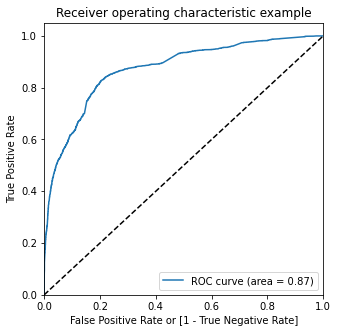

In [95]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- The ROC Curve should be a value close to 1. We are getting a good value of 0.87 indicating a good predictive model.

In [96]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.983503,1,1,1,1,1,1,1,1,1,1,1
1,0,0.092793,0,1,0,0,0,0,0,0,0,0,0
2,1,0.464938,0,1,1,1,1,1,0,0,0,0,0
3,1,0.447488,0,1,1,1,1,1,0,0,0,0,0
4,0,0.155713,0,1,1,0,0,0,0,0,0,0,0


In [97]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376132  1.000000  0.000000
0.1   0.1  0.544097  0.975496  0.284004
0.2   0.2  0.758939  0.877060  0.687723
0.3   0.3  0.801208  0.843262  0.775853
0.4   0.4  0.808835  0.784115  0.823739
0.5   0.5  0.796917  0.650190  0.885380
0.6   0.6  0.791991  0.566540  0.927916
0.7   0.7  0.784046  0.495986  0.957718
0.8   0.8  0.765136  0.416139  0.975548
0.9   0.9  0.713968  0.254330  0.991085


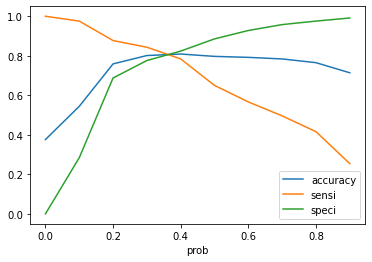

In [98]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

-  it is visible that the optimal cut off is at 0.36.

In [103]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
0,1,0.983503,1,1,1,1,1,1,1,1,1,1,1,1,98
1,0,0.092793,0,1,0,0,0,0,0,0,0,0,0,0,9
2,1,0.464938,0,1,1,1,1,1,0,0,0,0,0,1,46
3,1,0.447488,0,1,1,1,1,1,0,0,0,0,0,1,45
4,0,0.155713,0,1,1,0,0,0,0,0,0,0,0,0,16


In [106]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,final_Predicted,Lead_Score
0,1,0.983503,1,98
1,0,0.092793,0,9
2,1,0.464938,1,46
3,1,0.447488,1,45
4,0,0.155713,0,16


In [107]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1925
0     442
Name: final_Predicted, dtype: int64

In [109]:
# check the precentage of final_predicted conversions

1925/float(1925+442)


0.8132657372201099

- We can see that the final prediction with cutt off value 0.36 , the conversions have a target of 81.3% conversion as per the X Educations CEO's requirement.Hence, we can say that this is a good model.

In [110]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8072461465119974

In [111]:
# Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3155,  771],
       [ 442, 1925]], dtype=int64)

In [112]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8132657372201099

In [115]:
# Let us calculate specificity
TN / float(TN+FP)

0.8036169128884361

*Insight*:- 
-- So as we can see above the model seems to be performing well. The ROC curve has a value of 0.87, which is very good. We have the following values for the Train Data:

-Accuracy : 81.07%

-Sensitivity :81.32%

-Specificity : 80.36%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values.

In [116]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.19638308711156394


In [117]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7140207715133531


In [118]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8771198220739506


### Precision-Recall

In [178]:
from sklearn.metrics import precision_score, recall_score

In [179]:
# Calculating precision
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.7140207715133531

In [180]:
# Calculate recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8132657372201099

### Precision - Recall trade-off 

In [139]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [141]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6288    0
 6289    1
 6290    1
 6291    0
 6292    1
 Name: Converted, Length: 6293, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6288    0
 6289    1
 6290    1
 6291    0
 6292    1
 Name: Predicted, Length: 6293, dtype: int64)

In [142]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

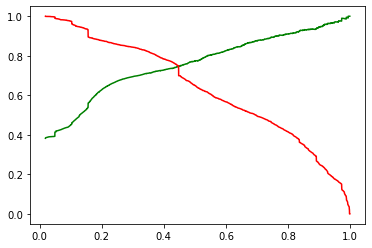

In [143]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [188]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score,final_predicted
0,1,0.983503,1,1,1,1,1,1,1,1,1,1,1,1,98,1
1,0,0.092793,0,1,0,0,0,0,0,0,0,0,0,0,9,0
2,1,0.464938,0,1,1,1,1,1,0,0,0,0,0,1,46,1
3,1,0.447488,0,1,1,1,1,1,0,0,0,0,0,1,45,1
4,0,0.155713,0,1,1,0,0,0,0,0,0,0,0,0,16,0


In [189]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.809470840616558

In [190]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3252,  674],
       [ 525, 1842]], dtype=int64)

In [191]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [192]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7321144674085851

In [193]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7782002534854245

- With the current cut off as 0.41 we have Precision around 73.2% and Recall around 78%

### Prediction on Test set 

#### Feature Scaling on Test set

In [194]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
8692,0.176471,0.136568,0,1,0,0,0,0,0,0,0,0,0
6126,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0
5198,0.176471,0.190925,0,1,0,0,0,0,0,1,0,0,0
4979,0.235294,0.386792,0,0,0,0,0,0,0,0,0,0,0
9225,0.117647,0.033243,0,1,0,1,0,0,0,0,1,0,0


In [195]:
#col = X_train.columns
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
8692,0.176471,0.136568,0,1,0,0,0,0,0,0,0,0,0
6126,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0
5198,0.176471,0.190925,0,1,0,0,0,0,0,1,0,0,0
4979,0.235294,0.386792,0,0,0,0,0,0,0,0,0,0,0
9225,0.117647,0.033243,0,1,0,1,0,0,0,0,1,0,0


In [196]:
X_test_sm = sm.add_constant(X_test)

In [197]:
X_test_sm.shape

(2698, 14)

In [198]:
y_test_pred = res.predict(X_test_sm)   

In [199]:
y_test_pred[:10]

8692    0.439111
6126    0.973002
5198    0.181703
4979    0.785114
9225    0.011880
3533    0.086202
2726    0.740935
3450    0.015010
7683    0.942876
6286    0.012363
dtype: float64

In [200]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [201]:
# Let's see the head
y_pred_1.head()

,0
8692,0.439111
6126,0.973002
5198,0.181703
4979,0.785114
9225,0.011880


In [202]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [203]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [204]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [205]:
y_pred_final.head()

,Converted,0
0,0,0.439111
1,1,0.973002
2,1,0.181703
3,1,0.785114
4,0,0.011880


In [206]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [207]:
y_pred_final.head()

,Converted,Converted_prob
0,0,0.439111
1,1,0.973002
2,1,0.181703
3,1,0.785114
4,0,0.011880


#### Assigning lead score 

In [208]:
# Rearranging the columns
y_pred_final = y_pred_final[['Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [209]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Converted_prob,Lead_Score
0,0,0.439111,44
1,1,0.973002,97
2,1,0.181703,18
3,1,0.785114,79
4,0,0.011880,1


In [221]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.36 else 0)

In [222]:
y_pred_final.head()

,Converted,Converted_prob,Lead_Score,final_Predicted
0,0,0.439111,44,1
1,1,0.973002,97,1
2,1,0.181703,18,0
3,1,0.785114,79,1
4,0,0.011880,1,0


In [223]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    822
0    210
Name: final_Predicted, dtype: int64

In [225]:
# check the precentage of final_predicted conversions on test data

822/float(822+210)

0.7965116279069767

- Hence we can see that the final prediction of conversions have a target rate of 80% (very close to training data set)

##### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on Test set

In [226]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7939214232765011

In [227]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1320,  346],
       [ 210,  822]], dtype=int64)

In [228]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [229]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7965116279069767

In [230]:
# Let us calculate specificity
TN / float(TN+FP)

0.7923169267707083

#### Precision and Recall metrics for the test set

In [231]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7037671232876712

In [232]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7965116279069767

*Inference* :- 
After running the model on the Test Data with cutt off 0.36 these are the figures we obtain:

-Accuracy : 79%
    
-Sensitivity :80%

-Specificity : 79.2%

## Conclusion 

- The Model seems to predict the conversion rate well with Accuracy, Sensivity and Specificity values around 79%, 80% and 79.2% respectively; this is close to the respective values calculated during Train set.


- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%. 


- Features responsible for good conversion rates are :- 
   
   a. *Total Time spent on website*
   
   b. *Total number of visits*
   
   c. *When lead source was :- Google, Direct Traffic, Olark chat and Organic search (in the same order)* 
   
   d. *When last activity was:- SMS , Email opened*
   
   e. *When the current occupation is - Working Professional*
   
   f. *Lead origin :- Lead Add form and Landing Page Submission bring higher number of leads as well as conversion.*
   
Keeping above features in mind X Education Forum can attract more potential buyers and could increase their conversion rate. 